# Tutorial: rebalance dataset using undersampling and oversampling

<!--<badge>--><a href="https://colab.research.google.com/github/kuennethgroup/ml_in_ms_st25/blob/main/04_ex/balance_data_and_save.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a><!--</badge>-->


Read through the tutorial and comments in the Python code.

,feat0,feat1,target
0,3.679826,4.681652,carcinogenic
1,2.947137,4.461168,carcinogenic
2,4.329681,5.643967,carcinogenic
3,6.734886,-9.389948,non-carcinogenic
4,2.443018,3.846526,carcinogenic


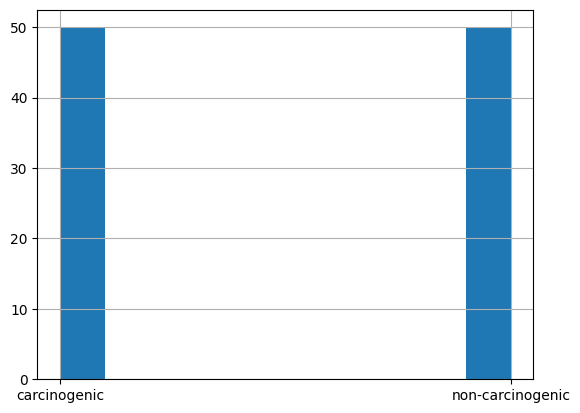

In [1]:
from sklearn.datasets import make_blobs
import pandas as pd

data = make_blobs(
    n_samples=100, centers=2, cluster_std=1, n_features=2, random_state=10
)

# Convert the data to a pandas dataframe
# data[0] == X, data[1] == y
column_names = [f"feat{n}" for n in range(data[0].shape[1])]
df_blob = pd.DataFrame(data[0], columns=column_names)


# add y (or target) but convert to data type string
# we do this because we want overwrite the "0" and "1" with strings
df_blob["target"] = data[1].astype(str)
# Select all the "1"s in the column target
df_blob.loc[
    df_blob["target"] == "1",  # Row; "1" not 1 because it's a string
    "target",  # Column
] = "carcinogenic"

df_blob.loc[
    df_blob["target"] == "0",
    "target",
] = "non-carcinogenic"

df_blob["target"].hist()
df_blob.head()

### Create imbalance

Here, we create a artificially imbalanced dataset

target
carcinogenic        50
non-carcinogenic    50
Name: count, dtype: int64

target
carcinogenic        50
non-carcinogenic    30
Name: count, dtype: int64

<Axes: >

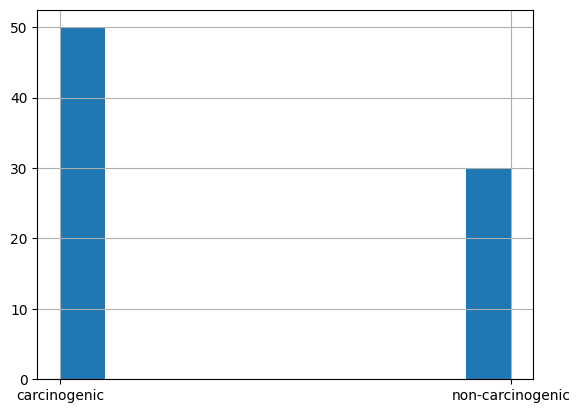

In [2]:
# the function value_counts counts the values
display(df_blob["target"].value_counts())

# remove 10 rows to artificially create an imbalance
# we select the only "non-carcinogenic" rows and take the 20 first indices "[:20]"
indices_to_remove = df_blob.loc[
    df_blob["target"] == "non-carcinogenic",
    "target",
].index[
    :20
]  # Select the first 20 by slicing

# Get rid of these rows
df_blob_imbalance = df_blob.drop(indices_to_remove)
# Count values again and plot
display(df_blob_imbalance["target"].value_counts())
df_blob_imbalance["target"].hist()

### Oversampling: rebalance the dataset to 50:50

1. Duplicate 20 lines in the minority class "non-carcinogenic" using pandas to rebalance the dataset to 50:50
2. Plot a histogram to confirm the balance of the classes in the dataset


### Undersampling: rebalance the dataset to 30:30

1. Remove 20 lines from the majority class "carcinogenic" using pandas to rebalance the dataset to 50:50
2. Plot a histogram to confirm the balance of the classes in the data set
